# Allele-Specific Expression

RNA sequencing can distinguish transcripts expressed from different copies of genes on homologous chromosomes when single-nucleotide polymorphisms (perhaps silent) distinguish the two alleles. Linkage between these distinctive SNPs and _cis_-regulatory sequences can provide information on regulatory variation within a shared cellular context.

## Null Hypothesis Testing

The null hypothesis in allele-specific expression analysis is that the alleles are expressed equally and so each read is equally likely to be derived from each allele.

Here, we'll take two approaches to get a _p_ value for the null hypothesis of equal expression in situations where just 25% of the reads come from one allele and 75% from the other. We'll look at this with just 8 reads, with 32 reads, and then with 100 reads.

### Permutation Testing

First, we'll generate many random sets of data according to the null model and look at the distribution of allele skew in these random data. Our approach to generating random sets of reads is simple: we choose randomly between `0` and `1`, and then count how often we choose `1` by summing the results of this random choice.

In [8]:
import numpy as np
#import matplotlib.pyplot as plt

print(np.random.choice(['A', 'C', 'G', 'T']))
print(np.random.choice([0,1], 8))
random_numbers = np.random.choice([0,1], 8)
print(sum(random_numbers))

G
[0 0 0 1 0 0 1 1]
5


Now, we'll generate 10,000 random samples of 8 reads each, and tabulate how many random samples have zero, one, ..., eight reads from that sample.

In [13]:
allele_counts_8 = [0]*9
print(allele_counts_8)
for i in range(0,10):
    reads = np.random.choice([0,1],8)
    n_reads = sum(reads)
    allele_counts_8[n_reads] = allele_counts_8[n_reads] + 1
    print("reads=", reads, n_reads, "counts=",allele_counts_8)
    
nucleotides = np.random.choice(['A', 'C'], 8)
num_As = 0
for nt in nucleotides:
    if nt == 'A':
        num_As = num_As + 1

[0, 0, 0, 0, 0, 0, 0, 0, 0]
reads= [1 1 0 0 0 1 0 1] 4 counts= [0, 0, 0, 0, 1, 0, 0, 0, 0]
reads= [0 0 1 1 0 1 0 1] 4 counts= [0, 0, 0, 0, 2, 0, 0, 0, 0]
reads= [0 0 1 0 1 1 0 1] 4 counts= [0, 0, 0, 0, 3, 0, 0, 0, 0]
reads= [1 1 0 1 0 0 0 1] 4 counts= [0, 0, 0, 0, 4, 0, 0, 0, 0]
reads= [1 0 0 0 1 0 0 0] 2 counts= [0, 0, 1, 0, 4, 0, 0, 0, 0]
reads= [0 0 0 1 1 0 1 1] 4 counts= [0, 0, 1, 0, 5, 0, 0, 0, 0]
reads= [1 0 0 0 1 0 0 0] 2 counts= [0, 0, 2, 0, 5, 0, 0, 0, 0]
reads= [1 1 1 1 1 1 0 0] 6 counts= [0, 0, 2, 0, 5, 0, 1, 0, 0]
reads= [0 0 0 1 0 1 0 1] 3 counts= [0, 0, 2, 1, 5, 0, 1, 0, 0]
reads= [1 1 0 0 0 0 0 1] 3 counts= [0, 0, 2, 2, 5, 0, 1, 0, 0]


In [14]:
allele_counts_8 = [0] * 9
print(allele_counts_8)
for i in range(0,10000):
    n_reads = sum(np.random.choice([0,1], 8))
    allele_counts_8[n_reads] += 1
    # x = x + 1 is the same as x += 1
print(allele_counts_8)


[0, 0, 0, 0, 0, 0, 0, 0, 0]
[46, 291, 1081, 2142, 2757, 2241, 1114, 298, 30]


Next, we'll plot the distribution

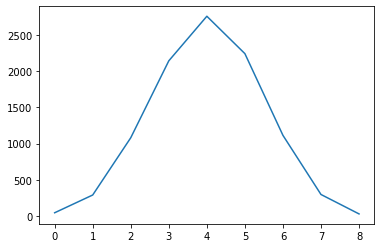

In [16]:
import matplotlib.pyplot as plt
plt.plot(allele_counts_8)

We can use this to ask: in what fraction of random samples do you see 12.5% (one-eighth) or fewer `1` reads? What can you conclude from seeing this kind of skew in a sample of 8 reads?

In [17]:
print(allele_counts_8[0] + allele_counts_8[1])
print(sum(allele_counts_8))
print(sum(allele_counts_8[0:2]) / sum(allele_counts_8))

337
10000
0.0337


What if we had no prior reason to look for a strong skew in one direction versus the other? That is, we're interested in situations where we had ≤12.5% or ≥87.5% frequence of `1` alleles?

In [18]:
print(allele_counts_8[0] + allele_counts_8[1])
print(allele_counts_8[7] + allele_counts_8[8])

print((sum(allele_counts_8[0:2]) 
       + sum(allele_counts_8[7:9])) 
      / sum(allele_counts_8))

337
328
0.0665


We can repeat the same analysis, for 32 reads per random sample.

13
[0, 0, 1, 8, 94, 478, 2126, 7776, 24585, 65306, 149626, 300562, 524526, 809315, 1097962, 1317243, 1400101, 1316716, 1097614, 808085, 526377, 301605, 149871, 65063, 24481, 7792, 2155, 443, 75, 13, 1, 0, 0]


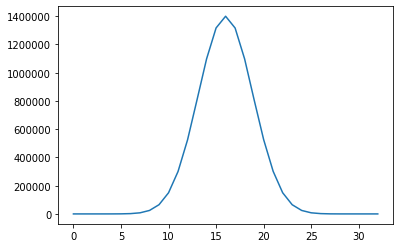

In [25]:
print(sum(np.random.choice([0,1], 32)))
allele_counts_32 = [0] * 33
for i in range(0,10000000):
    n_reads = sum(np.random.choice([0,1], 32))
    allele_counts_32[n_reads] += 1
print(allele_counts_32)
plt.plot(allele_counts_32)

Now we can test for a similar skew in our 32-read samples. 

In [23]:
print(sum(allele_counts_32[0:5]))
print(sum(allele_counts_32[28:33]))
print((sum(allele_counts_32[0:5]) 
       + sum(allele_counts_32[28:33])) 
      / sum(allele_counts_32))

1
0
0.0001


What about a stronger skew: at least 31 reads from one allele and no more than 1 from the other?

In [21]:
print((sum(allele_counts_32[0:2]) 
       + sum(allele_counts_32[31:33])) 
      / sum(allele_counts_32))

0.0


## Random Variables

There is probably a small but non-zero odds of getting this strong skew in the 32-read sample -- but we would need to generate a lot of random samples in order to figure out exactly how small. Instead, we can treat the number of reads from the `1` allele as a random variable with a binomial distribution. This isn't always a fair description of biological data, but it's a reasonable starting point here. 

### Binomial Distribution

The scipy package contains a statistics module with a sub-module specific for the binomial distribution. We can get the probability
```
P( k successes out of N trials with probability p of success per trial )
```
using
```
binom.pmf(k, N, p)
```
"pmf" here stands for "probability mass function".

For instance, we can ask about exactly 2 "successes" out of 8 "trials" -- think of this as 2 reads from the `1` allele out of 8 reads counted in total. We can also ask abotu exactly 2 reads from the `1` allele out of 32 total.

In [27]:
!pip3 install scipy
from scipy.stats import binom
print(binom.pmf(2, 8, 0.5))
print(binom.pmf(0, 32, 0.5))

0.10937500000000006
2.328306436538698e-10


We can also test a range of different k values, making it easy to sum up across many possibilities:

In [33]:
for k in range(0,5):
    print("k=", k, "binominal(k,32,0.5)=", binom.pmf(k,32,0.5))

k= 0 binominal(k,32,0.5)= 2.328306436538698e-10
k= 1 binominal(k,32,0.5)= 7.450580596923771e-09
k= 2 binominal(k,32,0.5)= 1.1548399925231895e-07
k= 3 binominal(k,32,0.5)= 1.154839992523193e-06
k= 4 binominal(k,32,0.5)= 8.372589945793018e-06


In [34]:
print(binom.pmf(range(0,5), 32, 0.5))
print(sum(binom.pmf(range(0,5), 32, 0.5)))

[2.32830644e-10 7.45058060e-09 1.15483999e-07 1.15483999e-06
 8.37258995e-06]
9.650597348809107e-06


We can use this to compute a precise value for the very small probability of the 1-or-fewer vs 31-or-more skew in 32 reads.

In [35]:
print(binom.pmf([0,1,31,32], 32, 0.5))
print(sum(binom.pmf([0,1,31,32], 32, 0.5)))

[2.32830644e-10 7.45058060e-09 7.45058060e-09 2.32830644e-10]
1.536682248115531e-08


We'd need to run a lot of simulations to find that p-value reliably!

We can also plot this distribution and compare it to our simulations.

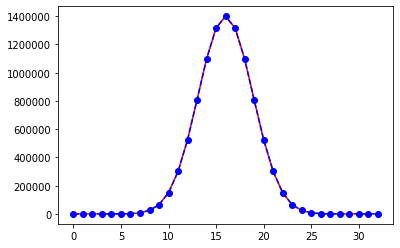

In [40]:
plt.plot(binom.pmf(range(0,32), 32, 0.5) * 10000000, '.-r')
plt.plot(allele_counts_32, 'o--b')

## Maximum Likelihood Estimation

Instead of simply testing whether allele expression is even, we want to _estimate_ the relative skew in expression. To do this, we will start by making a graph where we consider all possible bias values, and then figure out the likelihood function P( 4 reads out of 32 | bias ). We'll use the `binom.pmf` function again, but now we'll consider many different values for the 3rd _p_ parameter instead of the first one.

This graph looks similar to others that we've made, but the axes are different -- we'll add x and y axis labels to emphasize this difference.

In [44]:
np.arange(0,1.01,0.01)
binom.pmf(53, 100, np.arange(0,1.01,0.01))

array([0.00000000e+00, 5.26339530e-78, 2.94189501e-62, 3.90939770e-53,
       1.00540105e-46, 8.41068796e-42, 8.04335490e-38, 1.71912139e-34,
       1.22520578e-31, 3.76886240e-29, 5.96773852e-27, 5.51511367e-25,
       3.26364922e-23, 1.32682727e-21, 3.91403713e-20, 8.74859034e-19,
       1.53425437e-17, 2.17207600e-16, 2.54159106e-15, 2.50696678e-14,
       2.11948819e-13, 1.55778585e-12, 1.00753526e-11, 5.79497056e-11,
       2.99120715e-10, 1.39672749e-09, 5.94141806e-09, 2.31667850e-08,
       8.32558647e-08, 2.77107398e-07, 8.57918875e-07, 2.48021243e-06,
       6.71861245e-06, 1.71067056e-05, 4.10543723e-05, 9.30992013e-05,
       1.99941599e-04, 4.07482575e-04, 7.89499518e-04, 1.45659314e-03,
       2.56271405e-03, 4.30527399e-03, 6.91416805e-03, 1.06257160e-02,
       1.56401518e-02, 2.20658915e-02, 2.98595758e-02, 3.87761051e-02,
       4.83453350e-02, 5.78898415e-02, 6.65905000e-02, 7.35947673e-02,
       7.81496813e-02, 7.97319258e-02, 7.81446413e-02, 7.35567501e-02,
      

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
[0.00000000e+00 2.71397056e-04 3.26790773e-03 1.24140435e-02
 2.93531135e-02 5.34515925e-02 8.24146817e-02 1.13170804e-01
 1.42639168e-01 1.68247533e-01 1.88195809e-01 2.01516499e-01
 2.07998157e-01 2.08032968e-01 2.02436332e-01 1.92271378e-01
 1.78697972e-01 1.62855322e-01 1.45779874e-01 1.28355539e-01
 1.11290810e-01 9.51164030e-02 8.01972140e-02 6.67530835e-02
 5.48839340e-02 4.45959164e-02 3.58262397e-02 2.84652382e-02
 2.23749312e-02 1.74038543e-02 1.33983038e-02 1.02103587e-02
 7.

Text(0, 0.5, 'P(4 reads / 32 total)')

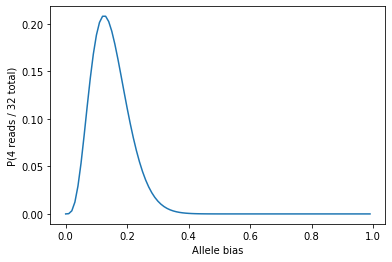

In [45]:
bias = np.arange(0,1,0.01)
print(bias)
print(binom.pmf(4, 32, bias))
plt.plot(bias, binom.pmf(4, 32, bias))
plt.xlabel('Allele bias')
plt.ylabel('P(4 reads / 32 total)')

As we discussed before, we often want to work with log likelihood functions. In fact, `binom` has the built-in ability to give us a log probability that will be numerically stable when the actual likelihood is a very tiny number, using the `logpmf` method.

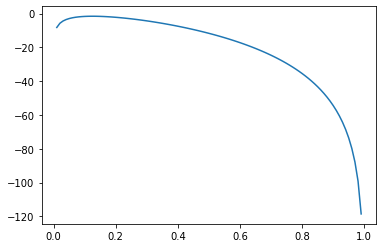

In [46]:
plt.figure()
plt.plot(bias, binom.logpmf(4, 32, bias))

In this plot, the likelihood function looks pretty flat around 0.25, but we might want to adjust the y-axis to focus on the region of high likelihood -- the default puts a lot of emphasis on parts of the plot where the likelihood is very small.

[0.1, 0.15, -4, 0]

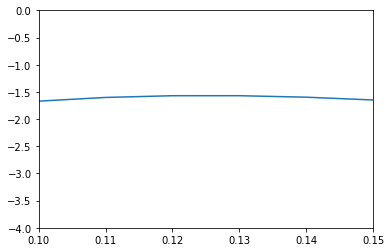

In [49]:
plt.figure()
plt.plot(bias, binom.logpmf(4, 32, bias))
plt.axis([0.1, 0.15, -4, 0])

We need to find the point on the x-axis where the likelihood is maximized. We can probably guess that this will happen at 0.125, but we can use algorithms from Scipy to find the best likelihood. These methods are typically expressed in terms of _minimization_, and so we'll minimize the negative log likelihood which is equivalent to finding the maximum of the likelihood.

To do this, we define a function to compute the negative log likelihood, called `negloglik`, and then use `minimize_scalar` from `scipy.optimize` to find the allele skew value that maximizes the likelihood of our data.

In [ ]:
from scipy.optimize import minimize_scalar
def negloglik(bias):
    return -binom.logpmf(4, 32, bias)
plt.plot(bias, negloglik(bias))
mle = minimize_scalar(negloglik, bounds=(0,1), method='bounded')
print(mle)

Below, we'll plot the log likelihood functions for:
* 1 read out of 8
* 4 reads out of 32
* 16 reads out of 128

[0, 1, -10, 0]

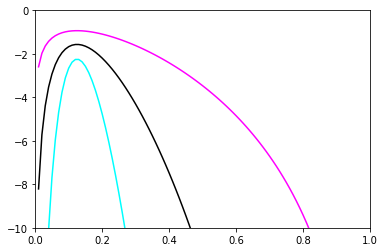

In [50]:
x = np.arange(0,1,0.01)
plt.plot(x, binom.logpmf(1, 8, x), color="magenta")
plt.plot(x, binom.logpmf(4, 32, x), color="black")
plt.plot(x, binom.logpmf(16, 128, x), color="cyan")
plt.axis([0,1,-10,0])